### Instalação e importação das Bibliotecas

#### Instalando (no terminal)
!pip install pandas matplotlib

#### Importando


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Configuração de exibição para gráficos

In [2]:
%matplotlib inline

### Lendo o arquivo CSV

In [3]:
file_path = "googleplaystore.csv" 
data = pd.read_csv(file_path)

# Visualizando as primeiras linhas para verificar se esta lendo o arquivo corretamente
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Removendo as duplicatas

In [4]:
# Releitura do arquivo original
data_original = pd.read_csv(file_path)

# Quantidade total de linhas antes de remover duplicatas
total_linhas_antes = data_original.shape[0]

# Removendo duplicatas com base na coluna 'App' e criando uma cópia do DataFrame resultante
data = data_original.drop_duplicates(subset=['App', 'Category']).copy()

# Quantidade total de linhas depois de remover duplicatas
total_linhas_depois = data.shape[0]

# Quantidade de duplicatas removidas
duplicatas = total_linhas_antes - total_linhas_depois

# Exibindo mensagens
print(f"Quantidade total de linhas antes da remoção de duplicatas: {total_linhas_antes}")
print(f"Quantidade total de linhas depois da remoção de duplicatas: {total_linhas_depois}")
print(f"Quantidade de duplicatas removidas: {duplicatas}")


Quantidade total de linhas antes da remoção de duplicatas: 10841
Quantidade total de linhas depois da remoção de duplicatas: 9745
Quantidade de duplicatas removidas: 1096


### Grafico de barras: Top 5 apps por numero de instalações

In [5]:
# Precisei fazer as mudanças abaixo pra conseguir gerar o grafico 

# Removendo caracteres não numéricos na coluna 'Installs'
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True)  

# Convertendo a coluna 'Installs' para numérico
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')  

# Removendo valores nulos, caso existam, após a conversão
data = data.dropna(subset=['Installs'])


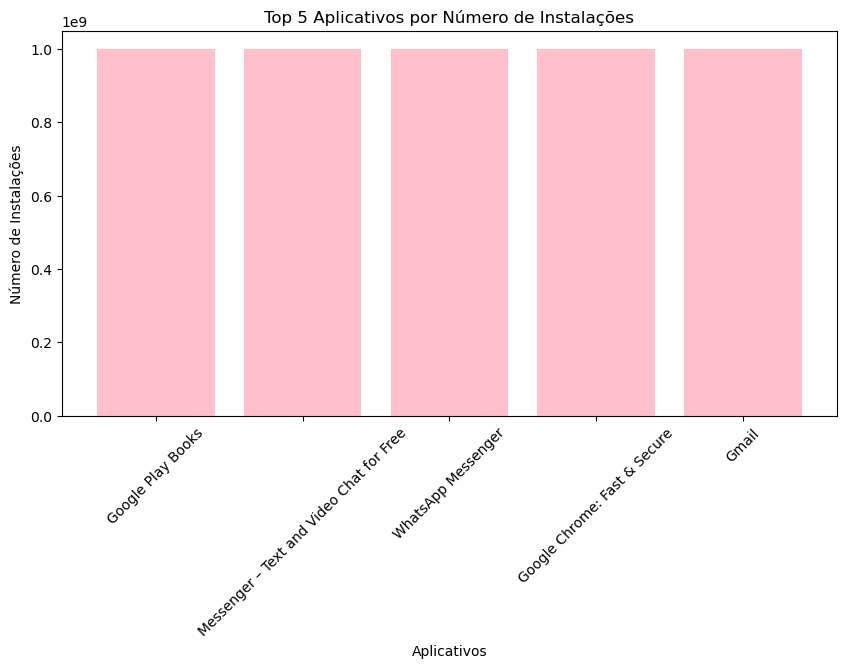

In [6]:
# Apos fazer as alterações acima só é necessario realizar os comandos abaixo de selecionar os apps e gerar o grafico.

# Selecionando os 5 apps com mais instalações
top_5_installs = data.nlargest(5, 'Installs')[['App', 'Installs']]

# Criando o grafico de barras
plt.figure(figsize=(10, 5))
plt.bar(top_5_installs['App'], top_5_installs['Installs'], color='pink')
plt.title('Top 5 Aplicativos por Número de Instalações')
plt.xlabel('Aplicativos')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45)
plt.show()

### Grafico de pizza: Categorias por Frequência de Aparição


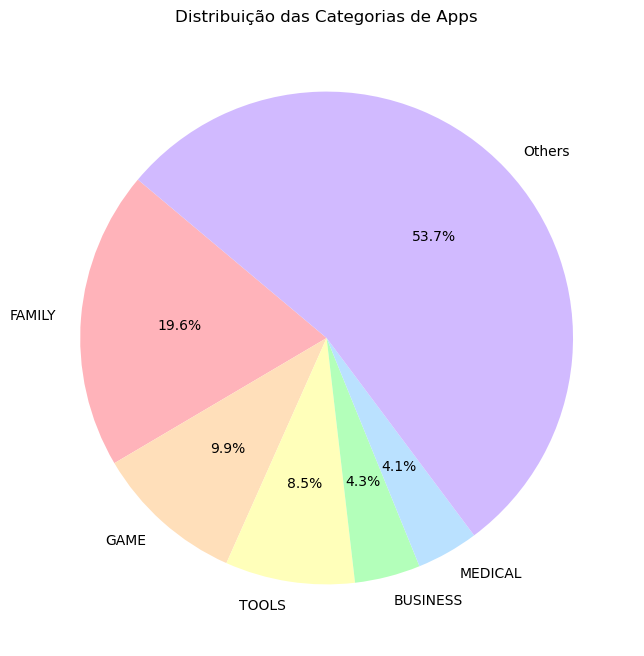

In [7]:
# Contar a frequência de cada categoria
categories_count = data['Category'].value_counts()

# Criando a categoria "Outros" para categorias com menos de 4% de participação
threshold = 0.04
categories_count = categories_count[categories_count / categories_count.sum() >= threshold]

# Categorias com menos de 3% vão para "Outros"
others_count = data['Category'].value_counts()[data['Category'].value_counts() / data['Category'].value_counts().sum() < threshold]
categories_count['Others'] = others_count.sum()

# Definindo uma paleta de cores 
pastel_arco_iris = ['#FFB3BA','#FFDFBA','#FFFFBA','#B3FFBA','#BAE1FF','#D1BAFF','#FFBAF3','#FF9B9B','#D1F7FF']  

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))  
categories_count.plot.pie(
    autopct='%1.1f%%',  
    startangle=140,  
    colors=pastel_arco_iris 
)
plt.title('Distribuição das Categorias de Apps') 
plt.ylabel('')  
plt.show() 



### Exibindo App Mais Caro 

In [8]:
# Exibindo o aplicativo mais caro
app_mais_caro = data.loc[data['Price'].idxmax()]
app_mais_caro[['App', 'Price']]


App      Photo Editor & Candy Camera & Grid & ScrapBook
Price                                                 0
Name: 0, dtype: object

#### Contagem de apps classificados como "Mature 17+"



In [9]:
# Contagem de apps classificados como "Mature 17+"
mature_17_count = data[data['Content Rating'] == 'Mature 17+'].shape[0]
print(f"Quantidade de aplicativos classificados como 'Mature 17+': {mature_17_count}")


Quantidade de aplicativos classificados como 'Mature 17+': 393


### Top 10 apps por número de reviews

In [10]:
# Convertendo a coluna 'Reviews' para numérico
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Removendo valores nulos, caso existam
data = data.dropna(subset=['Reviews'])

# Removendo duplicatas por app, mantendo o maior número de reviews
data = data.loc[data.groupby('App')['Reviews'].idxmax()]

# Top 10 apps por número de reviews
top_10_reviews = data.nlargest(10, 'Reviews')[['App', 'Reviews']]

# Exibindo os 10 apps com maior número de reviews de forma decrescente
print("Top 10 Aplicativos por Número de Reviews (ordem decrescente):")
print(top_10_reviews)


Top 10 Aplicativos por Número de Reviews (ordem decrescente):
                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2545                                          Instagram  66577313
335            Messenger – Text and Video Chat for Free  56642847
1670                                     Clash of Clans  44891723
4005            Clean Master- Space Cleaner & Antivirus  42916526
1654                                     Subway Surfers  27722264
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1660                                       Clash Royale  23133508


### Top 10 Categorias com Mais Apps

In [11]:
# Contando o número de apps por categoria e pegando as top 10
top_10_categories = data['Category'].value_counts().head(10)

# Exibindo o resultado 
print("Top 10 Categorias com mais Apps:")
for i, (category, count) in enumerate(top_10_categories.items(), 1):
    print(f"{i}. {category}: {count}")


Top 10 Categorias com mais Apps:
1. FAMILY: 1873
2. GAME: 947
3. TOOLS: 829
4. BUSINESS: 420
5. MEDICAL: 395
6. PERSONALIZATION: 376
7. PRODUCTIVITY: 374
8. LIFESTYLE: 369
9. FINANCE: 345
10. SPORTS: 325


### Categoria Mais Popular com Base no Número de Instalações

In [12]:
# Somar o número de instalações por categoria
category_installs = data.groupby('Category')['Installs'].sum()

# Encontrar a categoria mais popular
most_popular_category = category_installs.idxmax()
most_popular_installs = category_installs.max()

# Exibindo o resultado
print(f"A categoria mais popular é: {most_popular_category}, com {most_popular_installs} instalações no total.")


A categoria mais popular é: GAME, com 13427924415.0 instalações no total.


### Graficos dos indicadores acima

#### Top 10 Categorias com Mais Apps

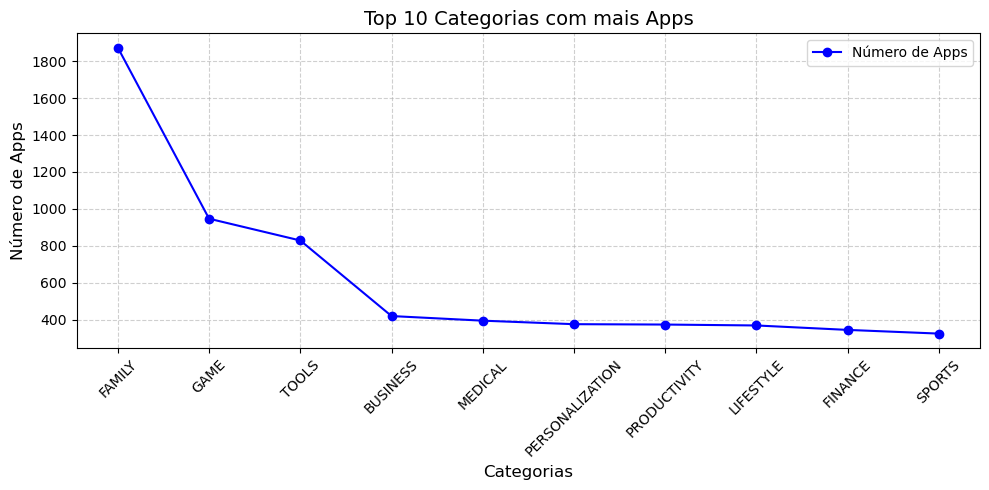

In [13]:
import matplotlib.pyplot as plt

# Extraindo os dados da variável top_10_categories
categories = top_10_categories.index  # Obtém os rótulos (categorias)
counts = top_10_categories.values     # Obtém os valores (número de apps)

# Gráfico de Linhas
plt.figure(figsize=(10, 5))
plt.plot(categories, counts, marker='o', linestyle='-', color='b', label='Número de Apps')
plt.title('Top 10 Categorias com mais Apps', fontsize=14)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de Apps', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Categoria Mais Popular com Base no Número de Instalações

<Figure size 1000x500 with 0 Axes>

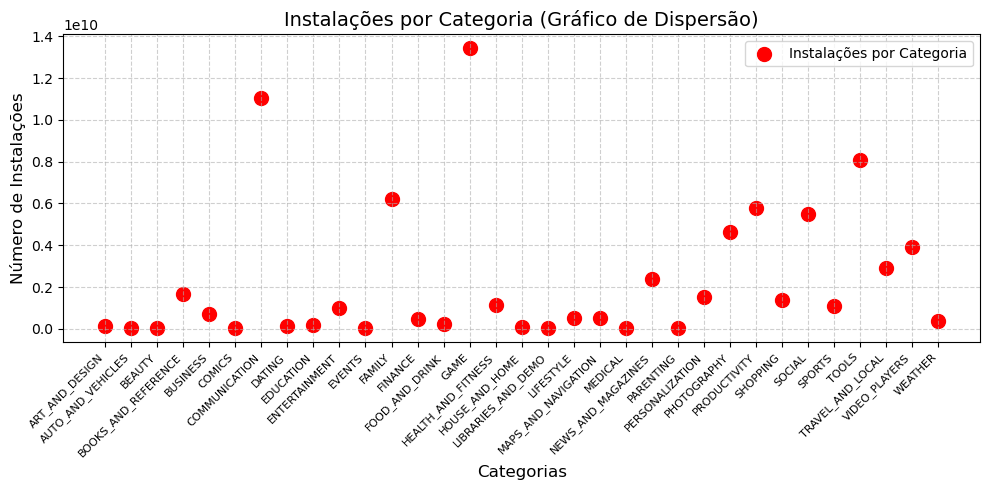

In [15]:
categories = category_installs.index  # Obtém os nomes das categorias
installs = category_installs.values   # Obtém os valores de instalações
# Gráfico de Dispersão
plt.figure(figsize=(10, 5))
plt.scatter(categories, installs, color='r', s=100, label='Instalações por Categoria')
plt.title('Instalações por Categoria (Gráfico de Dispersão)', fontsize=14)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)
plt.xticks(rotation=45, fontsize=8, ha='right')  
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()